In [2]:
import numpy as np
import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import pandas.util.testing as tm
import os
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras import backend as K
import pickle
import cv2
import matplotlib.pyplot as plt
from keras.layers import Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
default_image_size=tuple((128, 128))
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)  
            
            return  img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [9]:
directory_root='PlantVillage'
image_list=[]
img_name=[]
list_img_filename=[]

In [10]:
for  dirname,dis,filenames in os.walk(directory_root):
    #list_img_array.append(dirname)
    for filename in filenames:
     
        if filename.endswith(".jpg") == True or filename.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(os.path.join(dirname,filename)))
            img_name.append(dirname)
            list_img_filename.append(filename)

In [11]:
image_list[0]

array([[[104., 101., 116.],
        [111., 108., 123.],
        [122., 119., 134.],
        ...,
        [153., 152., 168.],
        [151., 150., 166.],
        [154., 153., 169.]],

       [[108., 105., 120.],
        [133., 130., 145.],
        [112., 109., 124.],
        ...,
        [155., 154., 170.],
        [155., 154., 170.],
        [148., 147., 163.]],

       [[119., 116., 131.],
        [111., 108., 123.],
        [105., 102., 117.],
        ...,
        [156., 155., 171.],
        [152., 151., 167.],
        [156., 155., 171.]],

       ...,

       [[165., 158., 171.],
        [167., 160., 173.],
        [175., 168., 181.],
        ...,
        [160., 151., 164.],
        [159., 150., 163.],
        [165., 156., 169.]],

       [[159., 152., 165.],
        [178., 171., 184.],
        [172., 165., 178.],
        ...,
        [158., 149., 162.],
        [155., 146., 159.],
        [156., 147., 160.]],

       [[156., 149., 162.],
        [167., 160., 173.],
        [169., 1

In [12]:
img_name[2]

'PlantVillage\\Pepper__bell___Bacterial_spot'

In [13]:
from sklearn.preprocessing import LabelBinarizer

In [14]:
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(img_name)
pickle.dump(label_binarizer,open('label_trns.pkl','wb'))
n_classes1 = len(label_binarizer.classes_)

In [15]:
n_classes1

13

In [16]:
print(len(image_list))
print(len(img_name))
b=len(labels)

18859
18859


In [17]:
labels[0:5]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [18]:
%load_ext tensorboard

In [19]:
label_list=[]
from os import listdir
root_dir = listdir('PlantVillage')

In [20]:
for classifi in root_dir:
    desis = os.listdir(f"{directory_root}/{classifi}")
    label_list.append(classifi)

In [21]:
from datetime import datetime
log_dir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

In [22]:
X=np.array(image_list)

In [23]:
X=X/255

In [24]:
print("[INFO] Spliting data to train, test")
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.2,stratify=labels, random_state = 42)

[INFO] Spliting data to train, test


In [25]:
model = tf.keras.applications.VGG16(weights="imagenet", include_top=False,input_shape=(128,128,3))

In [26]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [27]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [28]:
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [29]:
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x=  tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x=  tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
preds = tf.keras.layers.Dense(len(label_list), activation = 'softmax')(x)

In [30]:
model = tf.keras.models.Model(inputs = model.input, outputs = preds)

In [31]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [32]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d
20 dense
21 dense_1
22 dropout
23 dense_2
24 dropout_1
25 dense_3
26 dense_4


In [33]:
for layer in model.layers[:19]:
    layer.trainable = False

In [34]:
for layer in model.layers[19:]:
    layer.trainable = True

In [35]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
from datetime import datetime
log_dir="logs\\fit\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

In [37]:
hist2=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5,callbacks=[tensorboard_callback,EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001),])

Train on 15087 samples, validate on 3772 samples
Epoch 1/5
15087/15087 [==============================] - 2942s 195ms/sample - loss: 1.1172 - accuracy: 0.6370 - val_loss: 1.6946 - val_accuracy: 0.5938
Epoch 2/5
15087/15087 [==============================] - 2442s 162ms/sample - loss: 0.6788 - accuracy: 0.7852 - val_loss: 0.8414 - val_accuracy: 0.7423
Epoch 3/5
15087/15087 [==============================] - 1822s 121ms/sample - loss: 0.6121 - accuracy: 0.8086 - val_loss: 0.6181 - val_accuracy: 0.7985
Epoch 4/5
15087/15087 [==============================] - 1824s 121ms/sample - loss: 0.5668 - accuracy: 0.8287 - val_loss: 0.8823 - val_accuracy: 0.7447
Epoch 5/5
15087/15087 [==============================] - 1827s 121ms/sample - loss: 0.5735 - accuracy: 0.8310 - val_loss: 1.1801 - val_accuracy: 0.6922


In [38]:
model.save('vgg16_rmsprop.h5')

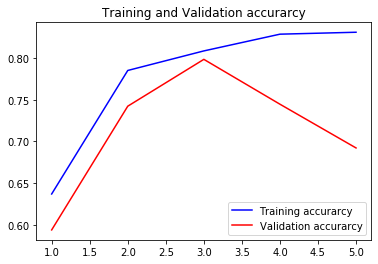

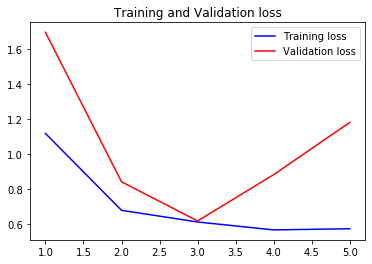

In [39]:
acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [41]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 12796), started 0:02:59 ago. (Use '!kill 12796' to kill it.)